In [1]:
import numpy as np                       # mathematical methods
from scipy import stats                  # statistical methods
from matplotlib import pyplot as plt     # plotting methods
%matplotlib inline

# Wahrscheinlichkeitstheorie

### Zufallsvariable und Wahrscheinlichkeitsraum
### Diskrete Zufallsvariablen und Wahrscheinlichkeitsverteilungen
### <span style="color:blue">Kontinuierliche Zufallsvariable und Wahrscheinlichkeitsverteilungen</span>
#### Kontinuierliche Verteilungen
- Rechteckverteilung,  Gauß'sche Normal-Verteilung,  Exponentialverteilung

#### Mehrdimensionale Verteilungen
#### <span style="color:blue">Außergewöhnliche Beispiele kontinuierlicher Verteilungen</span>
- Pareto-Verteilung
- Cauchy-Verteilung

#### Zusammengesetzte Verteilungen

### Wiederholung: Gleichverteilung / Rechteckverteilung
<br>
$$x\in \left[a, b\right]$$

$$f(x) = const = \frac{1}{b-a}$$

$$\mathcal{E}(X) = \mu = \frac{a+b}{2}$$

$$\mathrm{Var}(X) = \sigma^2 = \frac{(b-a)^2}{12}$$

### Wiederholung: Normalverteilung $\mathcal{N}$

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

$$\mathcal{E}(X) = \mu $$
$$\mathrm{Var}(X) = \sigma^2 $$
$$\text{Schiefe} = 0 $$
$$\text{Kurtosis} = 0 $$

#### Standardnormalverteilung $\phi(z)$
$$\phi(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}}$$
$$\mathcal{E}(Z) = 0 $$
$$\mathrm{Var}(Z) = 1$$

#### (kumulierte) Wahrscheinlichkeitsfunktion
$$F(x) = \int_{-\infty}^x f(x')\;\mathrm{d}x'$$

#### 68-95-99,7-Prozent-Regel

### Wiederholung: Exponentialverteilung
<br>
$$
f(x) = \begin{cases} \lambda e^{-\lambda x}\qquad & x\geq 0\\
                     0 \qquad & \text{sonst}
\end{cases}$$

$$\mathcal{E}(X) = \frac{1}{\lambda} $$
$$x_{med} = \frac{\ln 2}{\lambda} $$
$$\mathrm{Var}(X) = \frac{1}{\lambda^2}$$


# Außergewöhnliche Verteilungen

### "Pareto-Effekt"
oder 80-zu-20-Regel: 
- 80% der Ergebnisse werden mit 20% des Gesamtaufwandes erreicht
- Verbleibende 20% der Ergebnisse benötigen mit 80% die meiste Arbeit

## Pareto Verteilung
$$f(x) = \begin{cases} \displaystyle\frac{k\cdot x_{\min}^k}{x^{(k+1)}} & \;\mbox{für}\; x\geq x_{\min}\\ \qquad 0 & \;\mbox{sonst} \end{cases}$$

#### Beispiel aus der Praxis
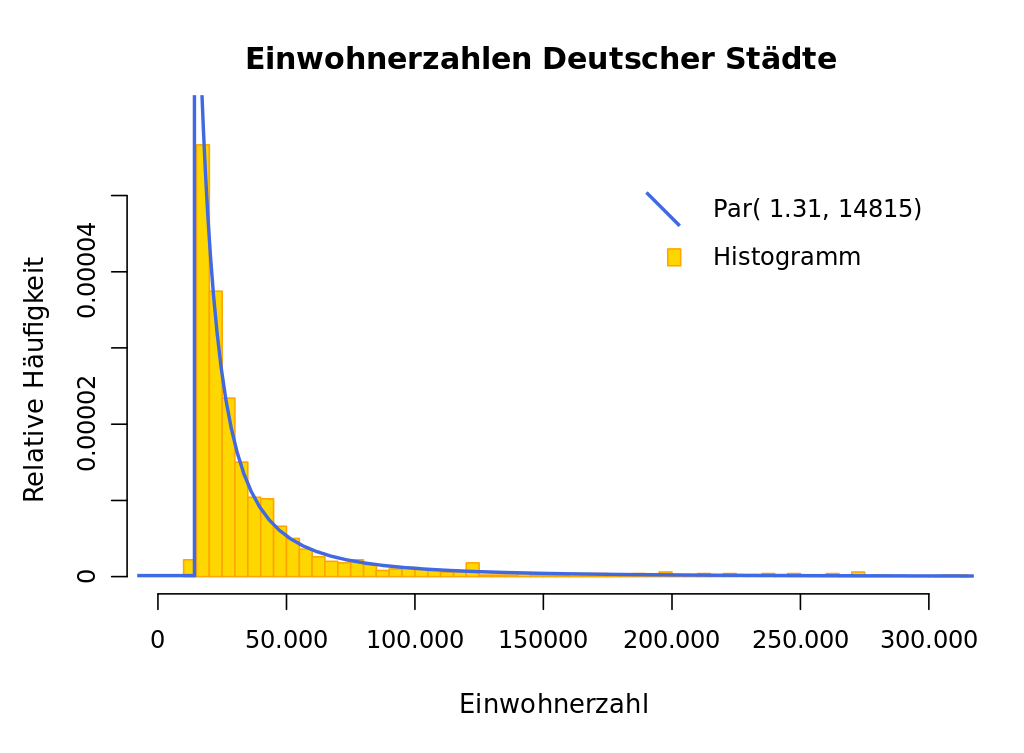
Quelle: Wikipedia (CC0 1.0 Verzicht auf das Copyright)

Wahrscheinlichkeitsdichte Pareto-Verteilung
$$f(x) = \begin{cases} \displaystyle\frac{k\cdot x_{\min}^k}{x^{(k+1)}} & \;\mbox{für}\; x\geq x_{\min}\\ \qquad 0 & \;\mbox{sonst} \end{cases}$$

Speziell mit Paramtern $k=2$ und $x_{\min}=1$ :

#### Wahrscheinlichkeitsdichte
$$f(x) = \begin{cases} \displaystyle\frac{2}{x^3} & \;\mbox{für}\; x\geq 1\\ 0 & \;\mbox{sonst} \end{cases}$$

#### Verteilungsfunktion
$$F(x) = \begin{cases} 1-\displaystyle\frac{1}{x^2} & \;\mbox{für}\; x\geq 1\\ 0 & \;\mbox{sonst} \end{cases}$$

### Erwartungswert
$$\mathcal{E}(X) = \int\limits_1^{\infty} ~ \frac{2}{x^2} ~ \mathrm{d}x = 2$$

Wahrscheinlichkeitsdichte
$$f(x) = \begin{cases} \displaystyle\frac{2}{x^3} & \;\mbox{für}\; x\geq 1\\ 0 & \;\mbox{sonst} \end{cases}$$

### Besonderheit: Varianz

$$ \mathcal{E}(X^2) = \int\limits_1^{\infty} ~ \frac{2}{x} ~ \mathrm{d}x = \infty$$

Und damit auch 
$$\mathrm{Var}(X)=\mathcal{E}(X^2)-(\mathcal{E}(X))^2 = \infty$$

### Modus:
$$ x_{\min}$$
### Median:
$$x_{\min}\sqrt[k]{2}$$
### letztes Quintil: 
$  Q_{0.8} = x_{\min}\sqrt[k]{5}$ 
$$\mathcal{E}(X|X>Q_{0.8}) = x_{\min}\frac{k}{k-1}/5^\frac{k-1}{k}$$

80% ergibt sich für $k \approx 1,16$.

In [2]:
'''German Cities' population > 10.000'''
# source: https://www.destatis.de/DE/ZahlenFakten/LaenderRegionen/Regionales/
#         Gemeindeverzeichnis/Administrativ/Archiv/GVAuszugQ/AuszugGV3QAktuell.html
import pandas as pd                  # allows easy import from data
limit = 14815  # 10000               # cities, not all villages, arbitrary 
data = pd.read_table('data/Staedte2015_10kplus.csv', sep=',') # read destatis data
print('population of German cities:')
print(data[:8])
pop = np.asarray([r[1] for i, r in enumerate(data.values)])   # get data in array
pop = pop[pop>=limit]                                         # restrict above limit

population of German cities:
                Name        0
0             Berlin  3421829
1            Hamburg  1746342
2            München  1407836
3               Köln  1034175
4  Frankfurt am Main   701350
5          Stuttgart   604297
6         Düsseldorf   598686
7           Dortmund   575944


In [4]:
'''fit empirical data to pareto distribution'''
pfit = stats.pareto.fit(pop, floc=0)     #fit shape and scale, keep location fixed@0 
print('German cities populations can be fitted as Pareto({:.3f}, {:.0f}) distributed'
      .format(pfit[0], pfit[2]) )

German cities populations can be fitted as Pareto(1.310, 14825) distributed


In [5]:
'''Quintiles of German cities' population'''
# empirical quintiles from sorted cities' index
quintiles = np.round(np.linspace(0, pop.shape[0]-1, 5+1)).astype(int)  
# theor. quintiles of fitted pareto distribution; be careful @ borders
fitq = stats.pareto.ppf([.0005, .2, .4, .6, .8, .9995], b=pfit[0], scale=pfit[2])
print('From {} real cities,'.format(pop.shape[0])) 
empqpop = np.zeros_like(fitq)    # (space for) empirical population in fitted quintiles
for q in range(5):
    pfrom, pto = (fitq[q], fitq[q+1])
    part  = pop[(pfrom<pop) & (pop<=pto)]
    empqpop[q+1] = empqpop[q] + part.shape[0]
    print('     {:.0f} are in {}. fit-quintile from {:6.0f} to {:7.0f}'.
          format(empqpop[q+1]-empqpop[q], q+1, pfrom, pto))

From 974 real cities,
     170 are in 1. fit-quintile from  14831 to   17579
     213 are in 2. fit-quintile from  17579 to   21898
     198 are in 3. fit-quintile from  21898 to   29844
     211 are in 4. fit-quintile from  29844 to   50668
     181 are in 5. fit-quintile from  50668 to 4916705


In [6]:
'''Test of pareto principle 80%20-20%80'''
n1 = np.asarray([n for n in pop[:182]]).sum()
n2 = np.asarray([n for n in pop[182:]]).sum()
print('{} habitants in 20% biggest cities'.format(n1))
print('{} habitants in 80% smaller cities'.format(n2))

32302386 habitants in 20% biggest cities
20010417 habitants in 80% smaller cities


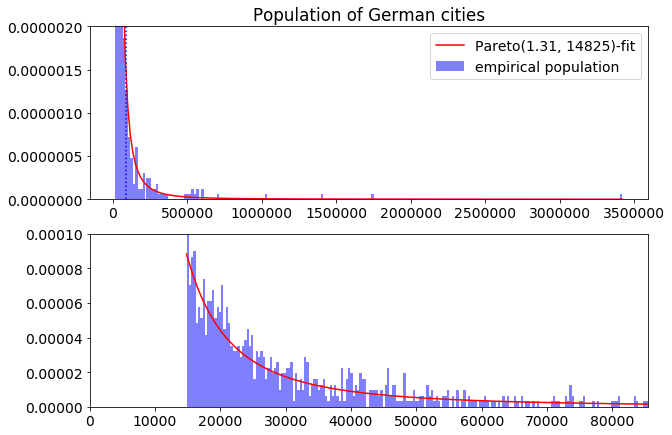

In [7]:
'''German cities - Pareto distribution - histogram'''
f = plt.figure(figsize=(10,7))
f.add_subplot(211)
plt.title('Population of German cities')
# plot empirical data 
pthreas = 85400    # Tuebingen
bins = np.linspace(pop.min(), pop.max(), 201)
plt.hist(pop, color='b', normed=True, bins=bins, alpha=.5, 
         label='empirical population')
# plot the fit
popi = np.linspace(pop.min(), pop.max(), 201)
plt.plot(popi, stats.pareto.pdf(popi, b=pfit[0], scale=pfit[2]), 'r-', 
         label='Pareto({:.2f}, {:.0f})-fit'.format(pfit[0], pfit[2]))
plt.ylim(0, 0.000002);
plt.legend()
plt.plot(2*[pthreas], [0, 0.000002], 'b:')
f.add_subplot(212)
# plot empirical data up to threashold
bins = np.linspace(pop.min(), pthreas, 201)
plt.hist(pop, color='b', normed=True, bins=bins, alpha=.5)
# plot fit
popi = np.linspace(pop.min(), pthreas, 201)
plt.plot(popi, stats.pareto.pdf(popi, b=pfit[0], scale=pfit[2]), 'r-')
plt.axis((0, pthreas, 0, 0.0001));

170 biggest cities have populations range 52400 to 3421829.


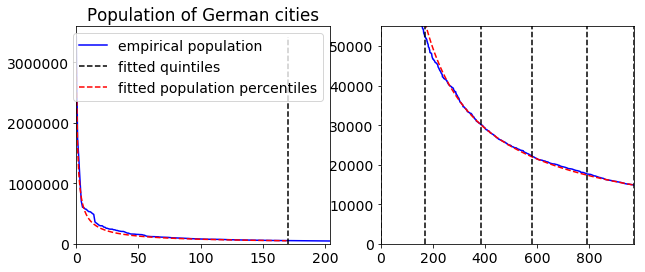

In [8]:
'''German cities - Pareto distribution - x-axis: index of city'''
f = plt.figure(figsize=(10,4))
f.add_subplot(121)                      # --- plot first quantile ---
plt.title('Population of German cities')
# plot empirical data
plt.plot(pop, 'b-', label='empirical population')
plt.xlim(0, 1.2*empqpop[1])             # show only 1st 20% of cities 
plt.ylim(0, 1.05*pop.max())             # max range including biggest city
plt.plot(2*[empqpop[1]], (0, pop.max()), 'k--', 
         label='fitted quintiles')      # mark the border between 1st and 2nd
# plot fitted data compressed to city after city
n_q1 = np.int(empqpop[1])               # number of cities in highest quintile
a_q1 = pop[0]                           #  between  3,5Mio and
b_q1 = pop[n_q1-1]                      #  and      ~50K
print('{} biggest cities have populations range {} to {}.'.format(n_q1, b_q1, a_q1))
x = np.linspace(0.999, 0.8, n_q1)       # probabilities for biggest quintile
popf = stats.pareto.ppf(x, b=pfit[0], scale=pfit[2])   # city population at percentile
plt.plot(popf, 'r--', label='fitted population percentiles')
plt.legend(loc='upper right')

f.add_subplot(122)                      # --- same plot for whole range ---
plt.plot(pop, 'b-')
plt.xlim(0, empqpop[-1])                # show complete range to last quintile border
ymax = 1.05*pop[n_q1]
plt.ylim(0, ymax)                       # max range starting 2nd quintile
# plot fitted data compressed to city after city
n_q1 = pop.shape[0]                     # number of cities total
x = np.linspace(0.999, 0.001, n_q1)     # probabilitie percentiles for number of cities
popf = stats.pareto.ppf(x, b=pfit[0], scale=pfit[2])  # city population at percentile
plt.plot(popf, 'r--')
for q in empqpop: 
    plt.plot((q, q), (0, ymax), 'k--'); # show quintiles of fitted distribution

----

# Cauchy/Lorentz-Verteilung
Familie von Verteilungen mit
$$f(x) = \frac{1}{\pi}\frac{s}{s^2+(x-t)^2}$$

Speziell mit dem Zentrum $t=0$ und der Breite $s=1$ *Standard-Cauchy-Verteilung*:
$$f(x) = \frac{1}{\pi}\frac{1}{1+x^2}$$

Kumulative Verteilungsfunktion
$$F(x) = \frac{1}{2}+\frac{1}{\pi}\cdot \arctan{x}$$

## Anwendung
#### Physik:
- Resonante Schwingung
- Form von Spektrallinien

#### Beziehung zur Normalverteilung
Der Quotient aus zwei unabhängigen standardnormalverteilten Zufallsvariablen ist Standard-Cauchy-verteilt.

#### Beziehung zu Student'schen t-Verteilung
Die Standard-Cauchy-Verteilung ist der Spezialfall der studentschen t-Verteilung mit einem Freiheitsgrad.

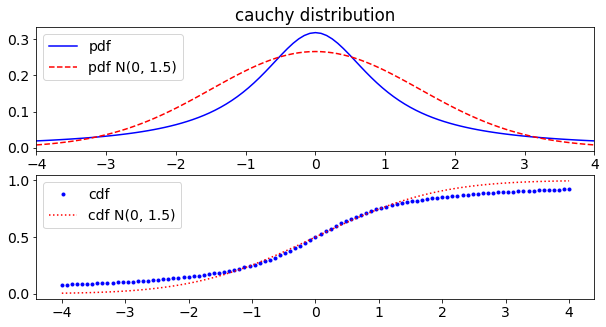

In [10]:
'''cauchy distribution - compare to Normal distribution'''
X = 4.                               # x = {-X..X}
x = np.linspace(-X, X, 101)
f = plt.figure(figsize=(10,5))
f.add_subplot(211)
plt.xlim((-X, X))
plt.title('cauchy distribution')
plt.plot(x, stats.cauchy.pdf(x), 'b-', label='pdf')
plt.plot(x, stats.norm(scale=1.5).pdf(x), 'r--', label='pdf N(0, 1.5)')
plt.legend(loc='upper left');
f.add_subplot(212)
plt.plot(x, stats.cauchy.cdf(x), 'b.', label='cdf')
plt.plot(x, stats.norm(scale=1.5).cdf(x), 'r:', label='cdf N(0, 1.5)')
plt.legend(loc='upper left');

### Besonderheit:

**Keines** der Momente ist definiert, 

die Integrale für Erwartungswert, Varianz, ... konvergieren alle **nicht**!

Moment-Integrale berechnen über Residuensatz. Oder Fouriertransformation....

#### Varianz ist berechenbar:
$$\mathrm{E}[X^2] \propto \int_{-\infty}^\infty \frac{x^2}{1+x^2}\,\mathrm{d}x = \int_{-\infty}^\infty (1 - \frac{1}{1+x^2})\,\mathrm{d}x $$
$$ \qquad\qquad = \int_{-\infty}^\infty \mathrm{d}x - \int_{-\infty}^\infty \frac{1}{1+x^2}\,\mathrm{d}x = \int_{-\infty}^\infty \mathrm{d}x-\pi = \infty$$

#### Erwartungswert:
- undefiniert
- Warum nicht Null aufgrund von Symmetrie?

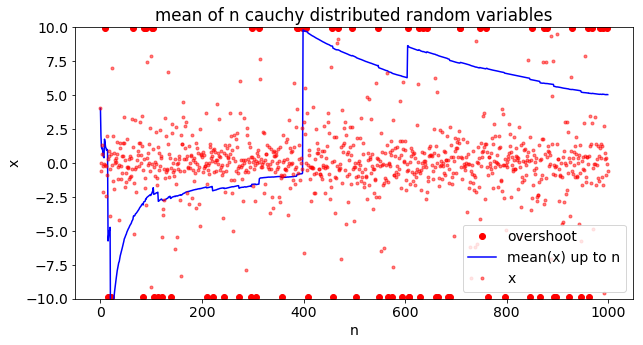

In [11]:
'''simulate expectation value of cauchy distributiion'''
N = 1000                                  # samples to draw
A = 10.                                   # plot x = {-A..A}
np.random.seed(987624)                    # fix random (have a nice example)
x = np.random.standard_cauchy(N)          # draw according cauchy distribution
n = np.arange(N)                          # i for x-axis; means of x until i
m = np.asarray([x[:i+1].mean() for i in n])    # mean for 0..i each
f = plt.figure(figsize=(10,5))
plt.ylim(-A, A)
q = np.ones_like(x)*2.*A                  # q out of plot region
q[x>A] = A-.1                             # if x out of plot region, set q to border
plt.plot(n, q, 'ro', label='overshoot')   # and plot as "overshoot"
q = np.ones_like(x)*2.*A                  # and
q[x<-A] = -A+.1                           # ...
plt.plot(n, q, 'ro')                      # same for "undershoot"
plt.plot(n, m, 'b-', label='mean(x) up to n')  # the means up to i
plt.plot(n, x, 'r.', alpha=.5, label='x') # values of drawn samples
plt.legend(loc='lower right')
plt.xlabel('n')
plt.ylabel('x')
plt.title('mean of n cauchy distributed random variables');

# Zusammenfassung
#### Außergewöhnliche Verteilungen
- Pareto-Verteilung
- Cauchy/Lorentz-Verteilung

#### Kennwerte
- ?!


# Fragen?